In [276]:
import numpy as np

## Exercise set 1, TFY4335

Week 34

**Ingrid Gustavsen**

### Problem 1.1

In [277]:
diameter_cell_human_body = 10 # micrometer
percentage_of_body = 0.5 # 50% of body composed of cells
volume_human_body = 70 # liter, 70 kg person
volume_cell = 4/3*np.pi*(diameter_cell_human_body/2*10**(-6))**3 # m^3, assuming spherical cells
number_of_cells = percentage_of_body*volume_human_body*10**(-3)/volume_cell # 10^-3 to convert from liter to m^3

print('Number of cells in human body: ', f"{number_of_cells:.1g}")

Number of cells in human body:  7e+13


In [278]:
#Estimate the combined length of all DNA molecules in a human body

length_dna_molecule_cell = 2 # meter, length of DNA molecule in a cell
combined_length_dna_molecule_human_body = number_of_cells*length_dna_molecule_cell # meter, length of DNA molecule in a human body

print('Combined length of all DNA molecules in a human body: ', f"{combined_length_dna_molecule_human_body:.1g}", 'm')


Combined length of all DNA molecules in a human body:  1e+14 m


### Problem 1.2

In [279]:
#Calculate the volume the same number of sand grains would occupy

diameter_sand_grain = 100 # micrometer
volume_single_sand_grain = 4/3*np.pi*(diameter_sand_grain/2*10**(-6))**3 # m^3, assuming spherical sand grains
percentage_of_beach = 0.5 # 50% of beach composed of sand
number_of_sand_grains = 7e13 # number of sand grains on a beach
volume_sand_grains = percentage_of_beach*number_of_sand_grains*volume_single_sand_grain # m^3

print('Volume sand grains would occupy on a beach: ', f"{volume_sand_grains*10**3:.5g}", 'liters')

Volume sand grains would occupy on a beach:  18326 liters


### Problem 1.3

In [280]:
#Red blood cells in a tea spoon of blood

volume_tea_spoon = 5 # ml
red_blood_cell_per_liter = 5*10**12 # Liter^-1
number_of_red_blood_cells = volume_tea_spoon*red_blood_cell_per_liter

print('Number of red blood cells in a tea spoon of blood: ', f"{number_of_red_blood_cells:.1g}")


Number of red blood cells in a tea spoon of blood:  2e+13


### E.1 Growth curves and the logistic equation: numerical integration

**Introduction**

The simplest equation to describe the growth of a population of bacteria is given by the Neidhard's differential equation

$$ \frac{\mathrm{d}N}{\mathrm{d}t} = rN $$

where $N$ is the number of bacteria, $t$ is the time and $r$ is the population growth rate. This differential equation can be analitically solved yielding an exponential growth of the population

$$ N(t) = N_0e^{rt} $$

where $N_0$ is the initial number of bacteria. 

A more complex model of the population growth is the one given by the so-called logistic equation

$$ \frac{\mathrm{d}N}{dt} = rN\left(1-\frac{N}{K}\right)$$

where $K$ is the saturation population size. Again, this differential equation has an analitical solution given by

$$ N(t)=\frac{KN_0e^{rt}}{K+N_0(e^{rt}-1)} $$

In this notebook, we will use python to numerically integrate the Neidhard's and logistic differential equations. We will solve these equations using two different numerical approaches: (i) the mathematical definition of the derivative and (ii) a built-in function from the library  [`scipy`](https://scipy.org/). To check the acuraccy of these numerical methods, we will compare them against the known analytical solutions of these differential equations presented above.

In [281]:
# First we import the libraries necessary to run this notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Let's define a function for each equation

def neidhard(t,N,r):
    return r*N

def integrated_neidhard(N0,r,t):
    return N0*np.exp(r*t)

def logistic(t,N,r,K):
    neidhard_factor=neidhard(r=r,
                            N=N,
                            t=t)
    return neidhard_factor*(1-N/K)

def integrated_logistic(N0,r,t,K):
    neidhard_factor_int=integrated_neidhard(N0=N0,
                                            r=r,
                                            t=t)
    numerator=K*neidhard_factor_int
    denominator=K+neidhard_factor_int-N0
    return numerator/denominator


## Numerical integration 

Before we start to integrate the differential equations, we need to define the parameters and the time interval that we will integrate. Furthermore, since we are using a numerical approach, we need to specify the number of points or the time differential that we will use for the integration. 

In [282]:
# Parameters
N0 = 100
#N0 = 500 
r = 0.0347 
K = 1000.

# time range
initial_time=0
final_time = 200
N_points=100 # Number of points for the numerical integration
dt = (final_time-initial_time)/N_points

t=np.linspace(initial_time, final_time, N_points)

Note that in the following cells of the notebook it will be assumed that this cell has been already been executed.

### Integration using the mathematical definition of a derivative

One can numerically integrate $\frac{dN}{dt}$ using the mathematical definition of a derivative

$$   \frac{\mathrm{d}N}{\mathrm{d}t} = \lim_{dt \rightarrow 0} \frac{N(t +  \mathrm{d}t) - N(t)}{\mathrm{d}t}  \approx \frac{N(t + \mathrm{d}t) - N(t)}{\mathrm{d}t} $$

where in the right-hand equallity we have assumed a finite time increment. Using this definition, we can rearrange the terms to find

$$ N(t + \mathrm{d}t) = N(t) +  \frac{\mathrm{d}N}{\mathrm{d}t} \mathrm{d}t$$

which will serve as the basis of our numerical integration.

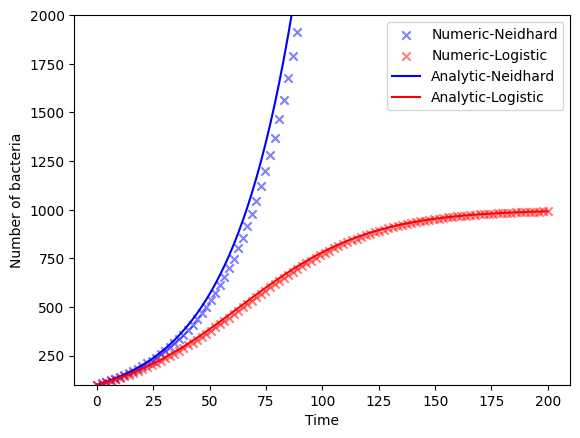

In [283]:
# Define a function to perform the numerical integration
def numerical_integrator(prev_value,dNdt, dt):
    return prev_value+dNdt*dt

# Create lists to store the integrated N values
N_values_neidhard=[N0]
N_values_logistic=[N0]

# Loop for the numerical integration
for _ in range(N_points-1):
    # Get the previous N point
    prev_value_neidhard=N_values_neidhard[-1]
    prev_value_logistic=N_values_logistic[-1]
    # Numerical integration of each method
    new_N_value_neidhard=numerical_integrator(prev_value=prev_value_neidhard,
                                              dNdt=neidhard(t=t,r=r,N=prev_value_neidhard), 
                                              dt=dt)
    new_N_value_logistic=numerical_integrator(prev_value=prev_value_logistic,
                                              dNdt=logistic(t=t,r=r,N=prev_value_logistic, K=K), 
                                              dt=dt)
    # Update the lists
    N_values_neidhard.append(new_N_value_neidhard)
    N_values_logistic.append(new_N_value_logistic)

# Plot the data

# Numerical values
plt.scatter(t, N_values_neidhard,color='b', label='Numeric-Neidhard', marker="x", alpha=0.5)
plt.scatter(t, N_values_logistic, color='r', label='Numeric-Logistic', marker="x", alpha=0.5)
# Analytical values
plt.plot(t, integrated_neidhard(N0=N0,r=r,t=t), 'b', label='Analytic-Neidhard')
plt.plot(t, integrated_logistic(N0=N0,r=r,t=t,K=K), 'r', label='Analytic-Logistic')

plt.xlabel('Time')
plt.ylabel('Number of bacteria')
plt.ylim(N0,2*K)
plt.legend(loc='best')
plt.show()

The reader is encouraged to experiment with different values of the parameters of the equation (e.g. different values of K and r) and different number of points for the numerical integration `N_points`. Notice that reducing the number of points will have a negative impact on the accuracy of the numerical integration, ultimately leading to deviations from the correct solution given by the analytical equations.

###  Integration using a built-in function from `scipy`

In scipy, there are several built-in functions with numerical methods to solve differential equations. One of the more commonly used functions is [scipy.integrate.solve_ivp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) function. 

Let us check how this function works for the same system as in the previous section

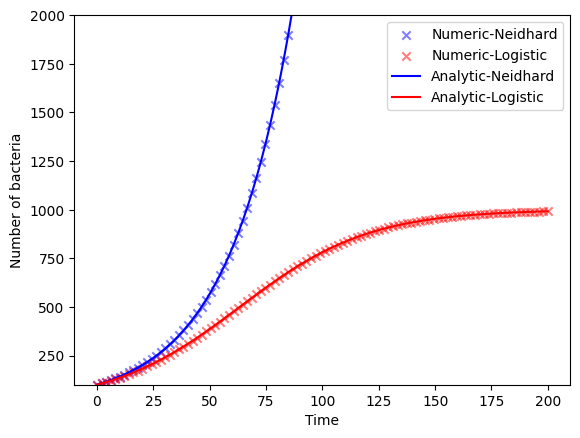

In [284]:

neidhard_integration_output = solve_ivp(fun=neidhard, # Differential eq. to integrate
                                        t_span=[initial_time,final_time], # Boundaries  
                                        y0=[N0],      # Initial value
                                        method='RK45',
                                        args=(r,),# Integration method
                                        t_eval=np.linspace(initial_time,final_time,N_points) # Time interval
                                       )

logistic_integration_output = solve_ivp(fun=logistic, # Differential eq. to integrate
                                        t_span=[initial_time,final_time], # Time interval  
                                        y0=[N0],      # Initial value
                                        method='RK45', # Integration method
                                        args=(r,K),
                                        t_eval=np.linspace(initial_time,final_time,N_points) # Time interval
                                       )



# The outputs of solve_ivp are objects in whose attributes contain the integration data
t=neidhard_integration_output.t
N_values_neidhard=neidhard_integration_output.y[0]
N_values_logistic=logistic_integration_output.y[0]


# Plot the data

# Numerical values
plt.scatter(t, N_values_neidhard,color='b', label='Numeric-Neidhard', marker="x", alpha=0.5)
plt.scatter(t, N_values_logistic, color='r', label='Numeric-Logistic', marker="x", alpha=0.5)
# Analytical values
plt.plot(t, integrated_neidhard(N0=N0,r=r,t=t), 'b', label='Analytic-Neidhard')
plt.plot(t, integrated_logistic(N0=N0,r=r,t=t,K=K), 'r', label='Analytic-Logistic')

plt.xlabel('Time')
plt.ylabel('Number of bacteria')
plt.ylim(N0,2*K)
plt.legend(loc='best')
plt.show()

Note that the numerical method `RK45` implemented in `scipy` is more accurate than the one we coded in the previous section, yielding a perfect agreement with the analytical solution even for a low number of sample points. 

### Problem 2.1: Obtain the analytical solution of this equation

This part is done in collaboration with Trond Hauklien.

We are given an equation describing a growth model:
$$
\tag{3.8b}
\frac{d N}{d t} = r N \left(1-\frac{N^2}{K^2}\right) =r N-\frac{r}{K^2}N^3.
$$
With $c_1 = -r$ and $c_2 = -\frac{r}{K^2}$, the equation can be written as
$$
\frac{d N}{d t} + c_1 N = c_2 N^3.
$$
We can use change of variables:
$$
N^{n-1}=Z, n=3 \Rightarrow \frac{dz}{dt}=-2N^{-3}\frac{dN}{dt}
$$

If we multiply the general form equation by $-2N^{-3}$ we get
$$
\begin{gather*}
-2N^{-3}\frac{d N}{d t} -2c_1N^{-2} = -2c_2 \\
\Downarrow \\
\frac{dZ}{dt} -2c_1Z=-2c_2.
\end{gather*}
$$

This gives us
$$
\frac{dZ}{dt} +2rZ=2\frac{r}{K^2}.
$$

Separation variables Z and t gives us
$$
\frac{dZ}{1-K^2Z} =\frac{2r}{K^2}dt
$$

Using a new change of variables
$$U = 1-K^2Z \Rightarrow -K^2dZ=dU

allows
$$\frac{dU}{U}=-2rdt.$$

Integrating
$$\int_{U_0}^{U}\frac{dU}{U}=-2r\int_{0}^{t}dt \Rightarrow \ln\frac{U}{U_0}=-2rt \Rightarrow U=U_0e^{-2rt}.$$

In terms of previous variables we get
$$
\begin{gather*}
1-K^2Z = (1-K^2Z_0)e^{-2rt} \Rightarrow Z(t) = \frac{1-(1-K^2Z_0)e^{-2rt}}{K^2} \\
\Rightarrow N^{-2}=\frac{1}{K^2}-\left( \frac{1}{K^2} +\frac{1}{N_0^2} \right)e^{-2rt} \\
\Rightarrow N(t)=\frac{kN_0\sqrt{e^{2rt}}}{\sqrt{N_0^2(e^{2rt}-1)-K^2}}
\end{gather*}
$$